In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [2]:
df=pd.read_csv("Student_Performance.csv")

In [3]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [5]:
df.shape

(10000, 6)

In [7]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [8]:
df.columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')

In [11]:
relevent_columns=['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index']
relevent_matric=df[relevent_columns].corr()
Performance_Index_correlation=relevent_matric["Performance Index"]
print(Performance_Index_correlation)

Hours Studied                       0.373730
Previous Scores                     0.915189
Sleep Hours                         0.048106
Sample Question Papers Practiced    0.043268
Performance Index                   1.000000
Name: Performance Index, dtype: float64


C:\Users\SAJID\AppData\Local\Temp\ipykernel_4284\3608920911.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  relevent_matric=df[relevent_columns].corr()


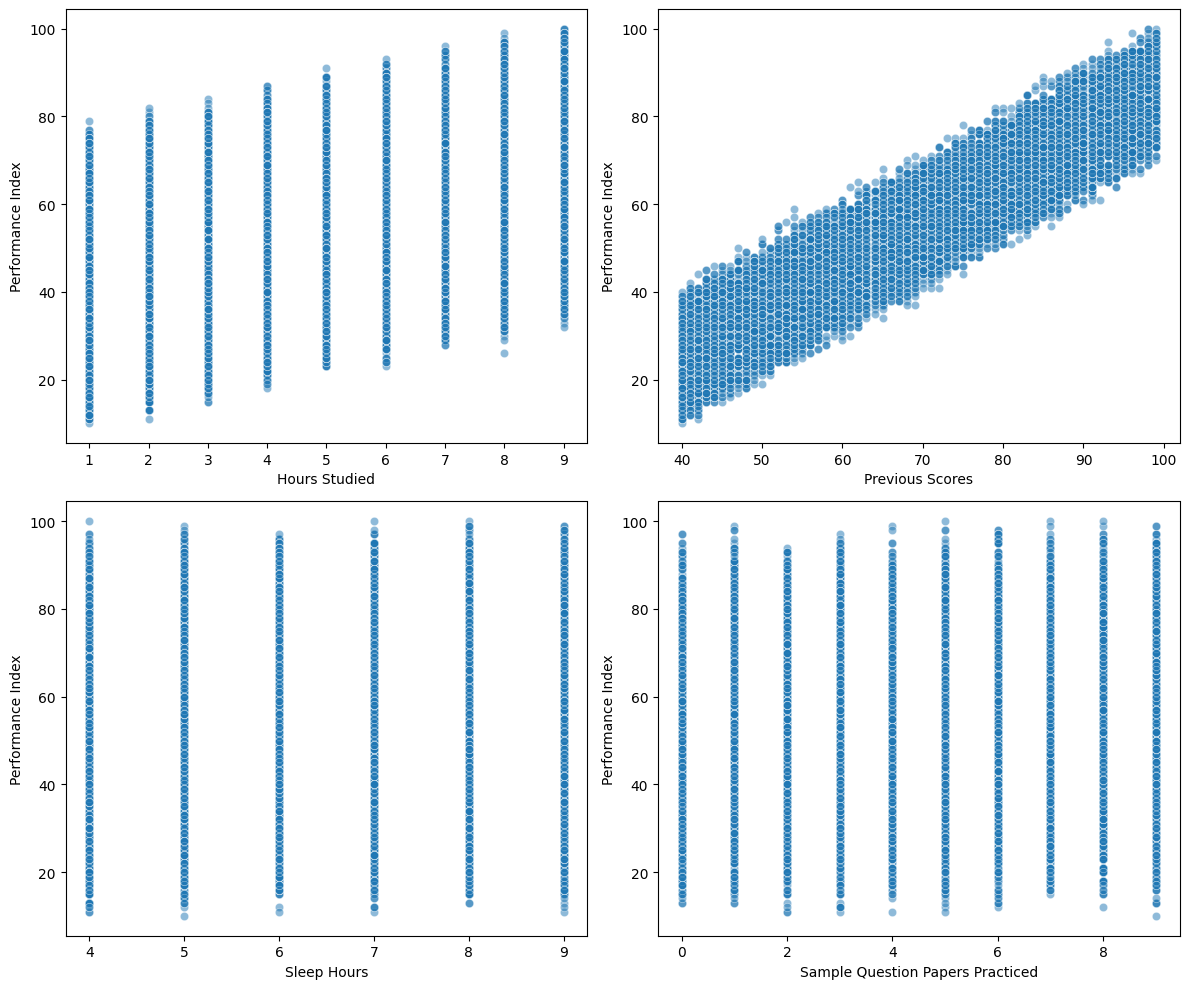

In [13]:
fig,axes=plt.subplots(2,2,figsize=(12,10))
sns.scatterplot(x='Hours Studied',y='Performance Index',data=df,ax=axes[0,0],alpha=0.5)
sns.scatterplot(x='Previous Scores',y='Performance Index',data=df,ax=axes[0,1],alpha=0.5)
sns.scatterplot(x='Sleep Hours',y='Performance Index',data=df,ax=axes[1,0],alpha=0.5)
sns.scatterplot(x='Sample Question Papers Practiced',y='Performance Index',data=df,ax=axes[1,1],alpha=0.5)
plt.tight_layout()
plt.show()

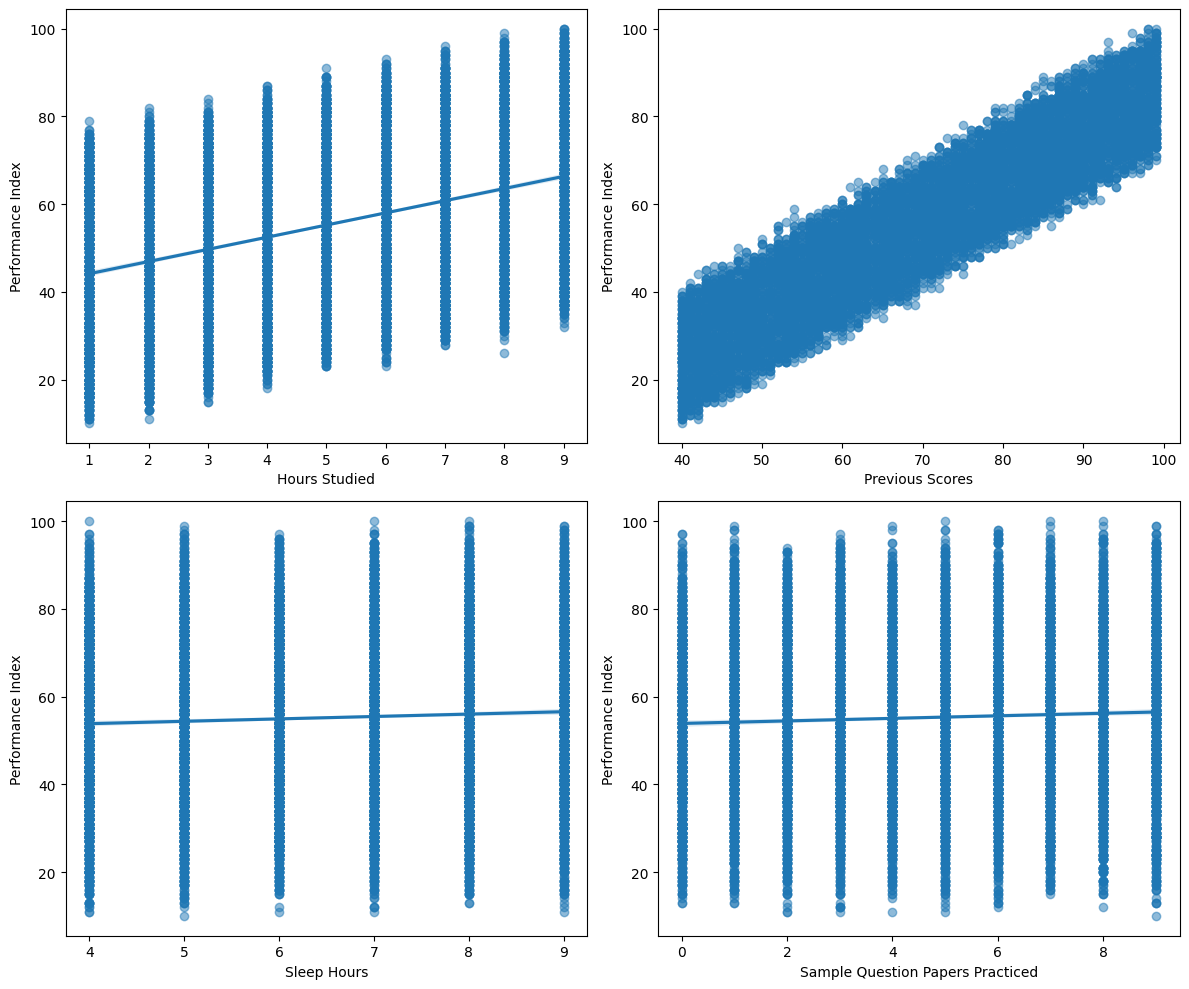

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Scatter plots with regression lines
sns.regplot(x='Hours Studied', y='Performance Index', data=df, ax=axes[0,0], scatter_kws={'alpha':0.5})
sns.regplot(x='Previous Scores', y='Performance Index', data=df, ax=axes[0,1], scatter_kws={'alpha':0.5})
sns.regplot(x='Sleep Hours', y='Performance Index', data=df, ax=axes[1,0], scatter_kws={'alpha':0.5})
sns.regplot(x='Sample Question Papers Practiced', y='Performance Index', data=df, ax=axes[1,1], scatter_kws={'alpha':0.5})

plt.tight_layout()
plt.show()


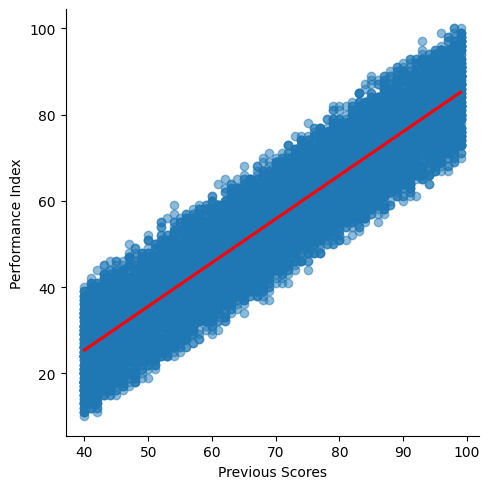

In [15]:
sns.lmplot(x="Previous Scores",
          y="Performance Index",
          data=df,
          scatter_kws={"alpha":0.5},
          line_kws={"color":"red"})

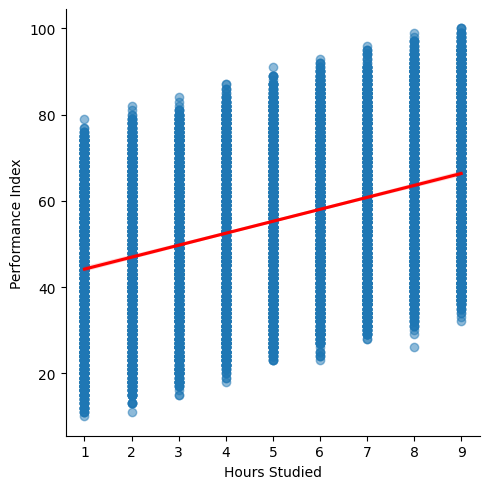

In [16]:
sns.lmplot(x="Hours Studied",
          y="Performance Index",
          data=df,
          scatter_kws={"alpha":0.5},
          line_kws={"color":"red"})

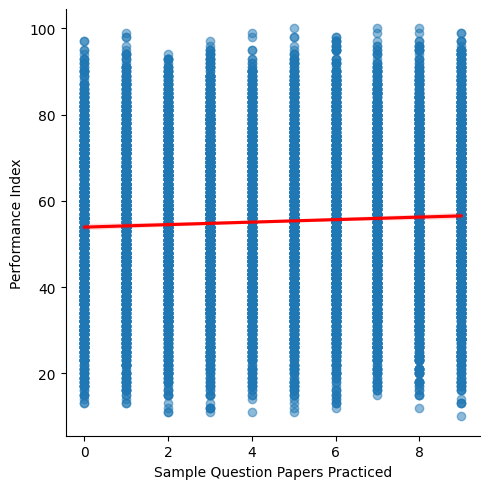

In [17]:
sns.lmplot(x="Sample Question Papers Practiced",
          y="Performance Index",
          data=df,
          scatter_kws={"alpha":0.5},
          line_kws={"color":"red"})

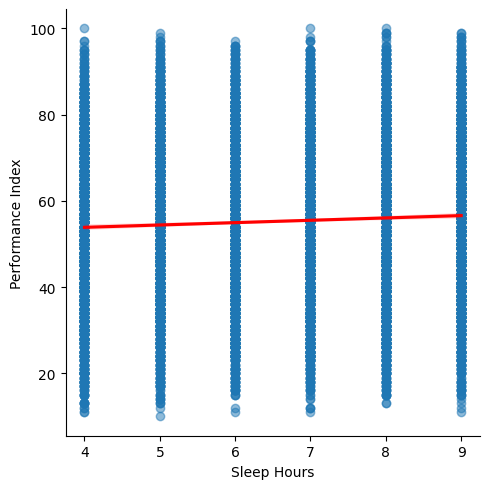

In [18]:
sns.lmplot(x="Sleep Hours",
          y="Performance Index",
          data=df,
          scatter_kws={"alpha":0.5},
          line_kws={"color":"red"})

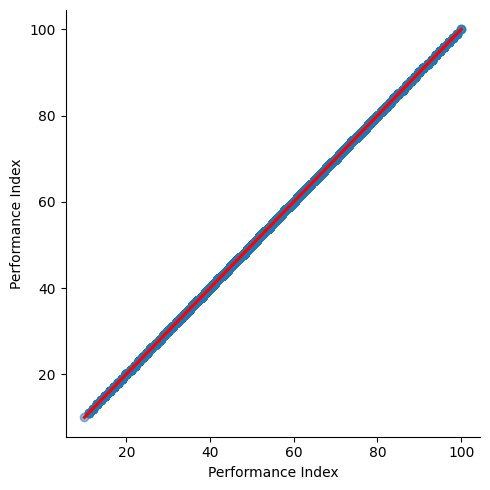

In [19]:
sns.lmplot(x="Performance Index",
          y="Performance Index",
          data=df,
          scatter_kws={"alpha":0.5},
          line_kws={"color":"red"})

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
df.columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')

In [22]:
X=df[['Hours Studied','Previous Scores','Sleep Hours','Sample Question Papers Practiced']]
y=df['Performance Index']

In [25]:
X.head()


,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced
0,7,99,9,1
1,4,82,4,2
2,8,51,7,2
3,5,52,5,2
4,7,75,8,5


In [26]:
y.head()

0    91.0
1    65.0
2    45.0
3    36.0
4    66.0
Name: Performance Index, dtype: float64

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
lm=LinearRegression()

In [30]:
lm.fit(X_train,y_train)

LinearRegression()

In [31]:
lm.coef_

array([2.85920197, 1.01565817, 0.47654598, 0.18934393])

In [32]:
cdf=pd.DataFrame(lm.coef_,X.columns,columns=['Coef']) # the lenght of member is high correlated with yearly amount spend
print(cdf)

                                      Coef
Hours Studied                     2.859202
Previous Scores                   1.015658
Sleep Hours                       0.476546
Sample Question Papers Practiced  0.189344


In [33]:
predictions=lm.predict(X_test)

Text(0.5, 1.0, 'predictions vsPerformance Index ')

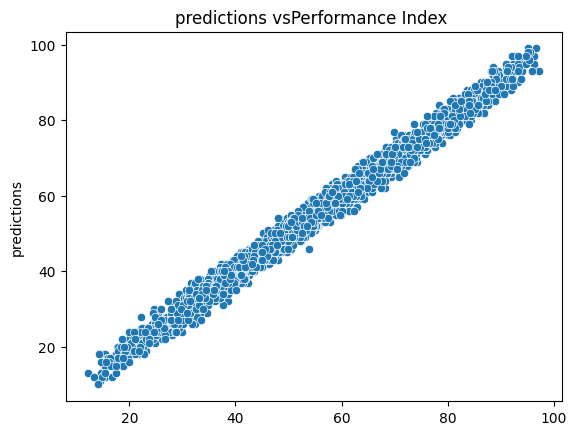

In [35]:
sns.scatterplot(x=predictions,y=y_test)
plt.ylabel("predictions")
plt.title("predictions vs Performance Index ")

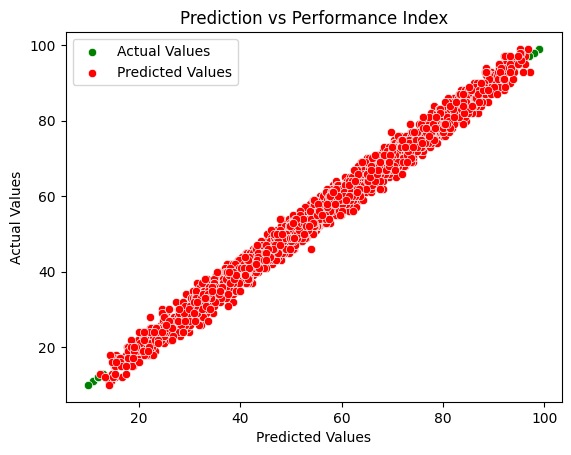

In [36]:
# Plot actual values
sns.scatterplot(x=y_test, y=y_test, color='green', label='Actual Values')

# Plot predicted values
sns.scatterplot(x=predictions, y=y_test, color='red', label='Predicted Values')

# Add labels and title
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.title("Prediction vs Performance Index")
plt.legend()  # Add a legend to differentiate between the actual and predicted values

plt.show()


In [37]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

In [38]:
print('Mean Absolute Error:',mean_absolute_error(y_test, predictions))
print('Mean Squared Error:',mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:',math.sqrt(mean_squared_error(y_test, predictions)))

Mean Absolute Error: 1.6301766341063662
Mean Squared Error: 4.181379974575143
Root Mean Squared Error: 2.044842285990571


C:\Users\SAJID\AppData\Local\Temp\ipykernel_4284\339810671.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals, bins=30)


<Axes: xlabel='Performance Index', ylabel='Density'>

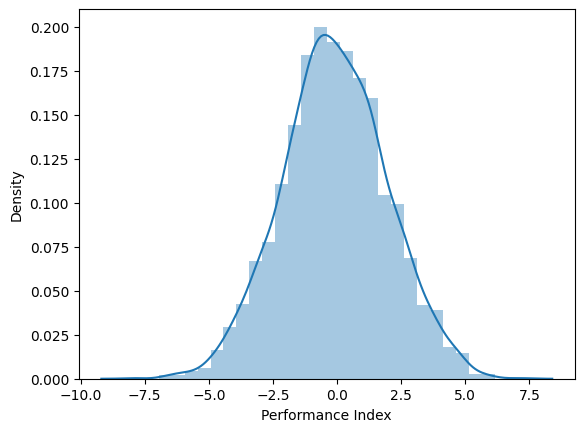

In [39]:
residuals = y_test-predictions
sns.distplot(residuals, bins=30)

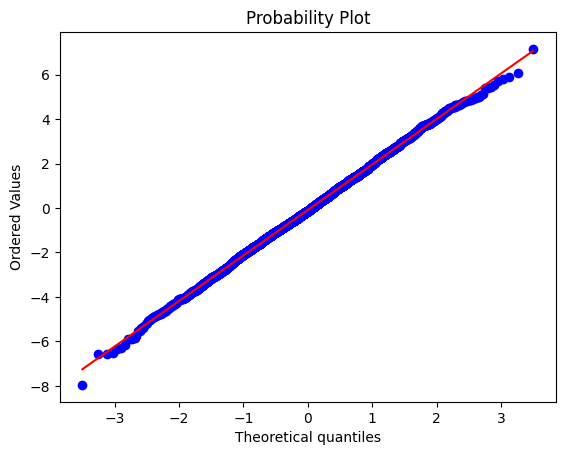

In [40]:
import pylab 
import scipy.stats as stats

stats.probplot(residuals, dist="norm", plot=pylab)
pylab.show()